In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
data = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data contains;

    age - age in years
    sex - (1 = male; 0 = female)
    cp - chest pain type
    trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    chol - serum cholestoral in mg/dl
    fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    restecg - resting electrocardiographic results
    thalach - maximum heart rate achieved
    exang - exercise induced angina (1 = yes; 0 = no)
    oldpeak - ST depression induced by exercise relative to rest
    slope - the slope of the peak exercise ST segment
    ca - number of major vessels (0-3) colored by flourosopy
    thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
    target - have disease or not (1=yes, 0=no)

In [4]:
cnt_noDisease = len(data[data.target == 0])
cnt_haveDisease = len(data[data.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((cnt_noDisease / (len(data.target)) * 100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((cnt_haveDisease / (len(data.target)) * 100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


In [5]:
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


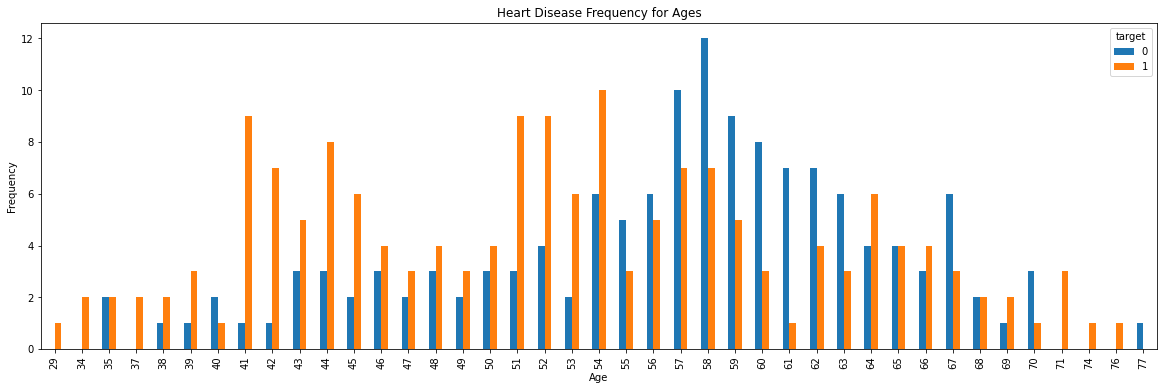

In [6]:
pd.crosstab(data.age, data.target).plot(kind = 'bar', figsize = (20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

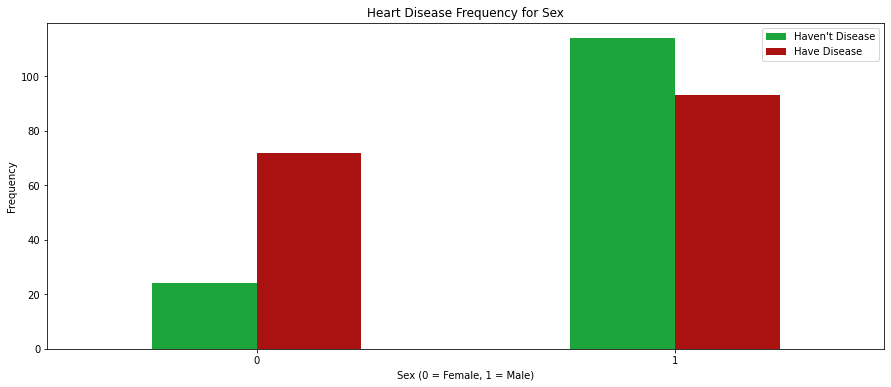

In [7]:
pd.crosstab(data.sex, data.target).plot(kind = 'bar', figsize=(15,6),color=['#1CA53B', '#AA1111'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

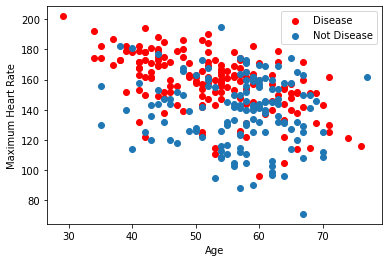

In [8]:
plt.scatter(x = data.age[data.target == 1] , y = data.thalach[(data.target == 1)], c='red')
plt.scatter(x = data.age[data.target == 0], y = data.thalach[(data.target == 0)])
plt.legend(['Disease', 'Not Disease'])
plt.xlabel('Age')
plt.ylabel("Maximum Heart Rate")
plt.show()

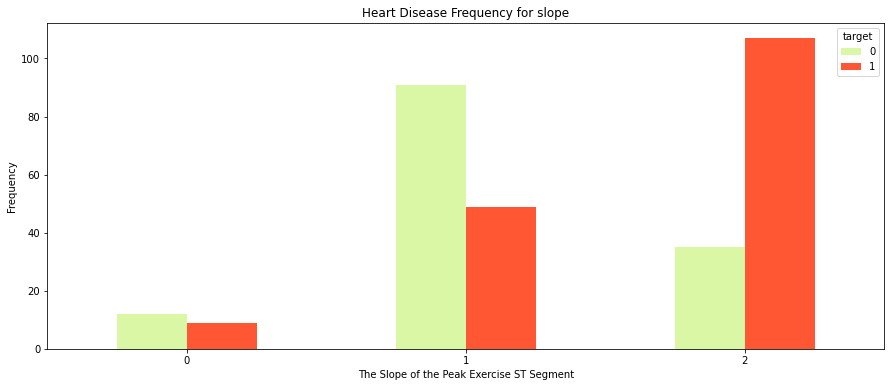

In [9]:
pd.crosstab(data.slope, data.target).plot(kind='bar', figsize=(15,6), color=['#DAF7A6','#FF5733'])
plt.title('Heart Disease Frequency for slope')
plt.xlabel('The Slope of the Peak Exercise ST Segment')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

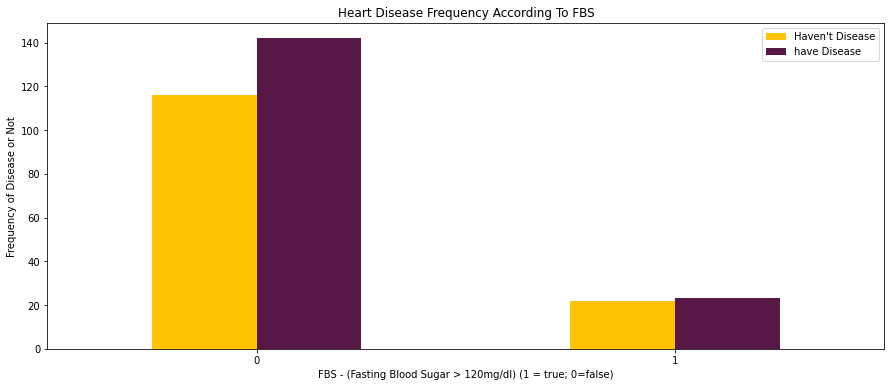

In [10]:
pd.crosstab(data.fbs , data.target).plot(kind= 'bar', figsize=(15,6), color=['#FFC300','#581845'])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120mg/dl) (1 = true; 0=false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

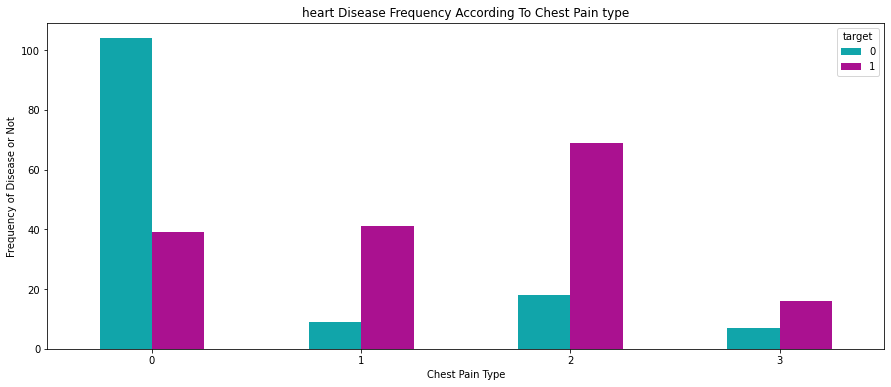

In [11]:
pd.crosstab(data.cp , data.target).plot(kind='bar', figsize = (15,6), color=['#11A5AA', '#AA1190'])
plt.title("heart Disease Frequency According To Chest Pain type")
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

# Creating Dummy Variables

In [12]:
a = pd.get_dummies(data['cp'], prefix = 'cp')
b = pd.get_dummies(data['thal'], prefix = 'thal')
c = pd.get_dummies(data['slope'], prefix = 'slope')

frames = [data, a, b, c]
data = pd.concat(frames, axis = 1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [13]:
data = data.drop(columns = ['cp', 'thal', 'slope'])
data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


Logistic Regression

In [14]:
y = data.target.values
x_data = data.drop(['target'], axis = 1)

In [15]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [18]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

In [19]:
def initialize(dimension):
    weight = np.full((dimension, 1), 0.01)
    bias = 0.0
    return weight, bias

In [20]:
def sigmoid(z):
    y_cap = 1 /(1 + np.exp(-z))
    return y_cap

In [21]:
def forwardBackward(weight, bias, X_train, y_train):
    # Forward
    y_cap = sigmoid(np.dot(weight.T, X_train) + bias)
    loss = -(y_train * np.log(y_cap) + (1-y_train) * np.log(1-y_cap))
    cost = np.sum(loss) / X_train.shape[1]
    
    #Backward
    derivative_weight = np.dot(X_train, ((y_cap - y_train).T)) / X_train.shape[1]
    derivative_bias = np.sum(y_cap - y_train) / X_train.shape[1]
    gradients = {"Derivative weight": derivative_weight,
                "Derivative Bias" : derivative_bias}
    
    return cost, gradients
    
    

In [28]:
def update(weight, bias, X_train, y_train, learningRate, iteration):
    costList = []
    index = []
    
    # for each iteration , update weight and bias values
    for i in range(iteration):
        cost, gradients = forwardBackward(weight, bias, X_train, y_train)
        weight = weight - learningRate * gradients["Derivative weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)
        
    parameters = {"weight" : weight, "bias": bias}
    print("iteration:", iteration)
    print("cost:", cost)
    
    plt.plot(index, costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    
    return parameters, gradients
    

In [34]:
def predict(weight, bias, x_test):
    z = np.dot(weight.T, x_test) + bias
    y_cap = sigmoid(z)
    
    y_prediction = np.zeros((1, X_test.shape[1]))
    
    for i in range(y_cap.shape[1]):
        if y_cap[0,i] <=0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [35]:
def logisticRegression(X_train, y_train, X_test, y_test, learningRate, iteration):
    dimension = X_train.shape[0]
    weight, bias = initialize(dimension)
    
    parameters, gradients = update(weight, bias, X_train, y_train, learningRate, iteration)
    y_prediction = predict(parameters['weight'], parameters['bias'], X_test)
    print("manual Test Accuracy: {:.2f}%".format((100-np.mean(np.abs(y_prediction - y_test))*100)))

iteration: 100
cost: 0.35977361236645333


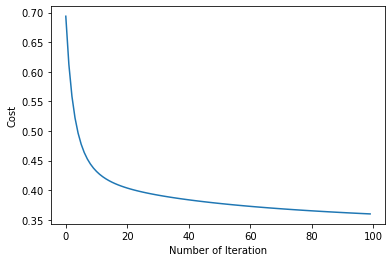

manual Test Accuracy: 86.89%


In [36]:
logisticRegression(X_train, y_train, X_test, y_test, 1, 100)

In [ ]:
accuracies = {}

lr = LogisticRegression()
lr.fit(X_train.T, y_train.T)
acc = lr.score(X_test.T, y_test.T)*100

accuracies['Logistic Regression'] = acc
print("test accuracy{:.2f}%".format(acc))